<a href="https://colab.research.google.com/github/ukablahblah/MAT-421/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Lagrange and Newton Polynomial Interpolation

# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt

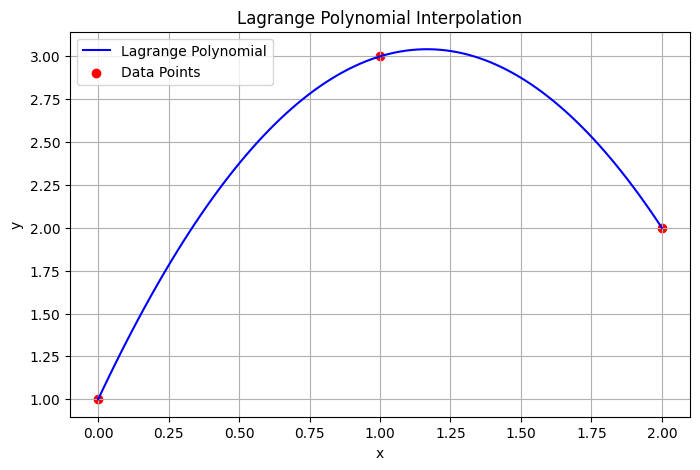

In [7]:
# Section 1: Lagrange Polynomial Interpolation
# ------------------------------------------------
# Let's start by defining a function to compute the Lagrange polynomial.
# The Lagrange polynomial is a weighted sum of basis polynomials.

def lagrange_interpolation(x_points, y_points, x):
    """
    Computes the Lagrange polynomial interpolation for a given set of points.

    Parameters:
    x_points (list or array): x-coordinates of the data points
    y_points (list or array): y-coordinates of the data points
    x (float or array): The x-value(s) where we want to evaluate the polynomial

    Returns:
    float or array: The interpolated value(s) at x
    """
    n = len(x_points)
    result = 0
    for i in range(n):
        # Compute the Lagrange basis polynomial L_i(x)
        L_i = 1
        for j in range(n):
            if i != j:
                L_i *= (x - x_points[j]) / (x_points[i] - x_points[j])
        # Add the contribution of L_i(x) * y_i to the result
        result += L_i * y_points[i]
    return result

# Example for Lagrange Interpolation
# -----------------------------------
# Let's use some example data points to demonstrate how Lagrange interpolation works.
x_points = [0, 1, 2]
y_points = [1, 3, 2]

# Generate a smooth curve for visualization
x_vals = np.linspace(0, 2, 100)
y_vals = [lagrange_interpolation(x_points, y_points, x) for x in x_vals]

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_vals, label="Lagrange Polynomial", color="blue")
plt.scatter(x_points, y_points, color="red", label="Data Points")
plt.title("Lagrange Polynomial Interpolation")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()



In [8]:
# Section 2: Newton's Polynomial Interpolation
# ------------------------------------------------
# Now, let's move on to Newton's Polynomial Interpolation.
# This method uses divided differences to construct the polynomial.

def divided_differences(x_points, y_points):
    """
    Computes the divided differences table for Newton's interpolation.

    Parameters:
    x_points (list or array): x-coordinates of the data points
    y_points (list or array): y-coordinates of the data points

    Returns:
    array: The divided differences table
    """
    n = len(x_points)
    table = np.zeros((n, n))
    table[:, 0] = y_points  # First column is just the y-values

    for j in range(1, n):
        for i in range(n - j):
            table[i, j] = (table[i + 1, j - 1] - table[i, j - 1]) / (x_points[i + j] - x_points[i])

    return table[0, :]  # Return the first row (coefficients)

def newton_interpolation(x_points, y_points, x):
    """
    Computes the Newton polynomial interpolation for a given set of points.

    Parameters:
    x_points (list or array): x-coordinates of the data points
    y_points (list or array): y-coordinates of the data points
    x (float or array): The x-value(s) where we want to evaluate the polynomial

    Returns:
    float or array: The interpolated value(s) at x
    """
    coeffs = divided_differences(x_points, y_points)
    n = len(coeffs)
    result = coeffs[0]
    product = 1
    for i in range(1, n):
        product *= (x - x_points[i - 1])
        result += coeffs[i] * product
    return result



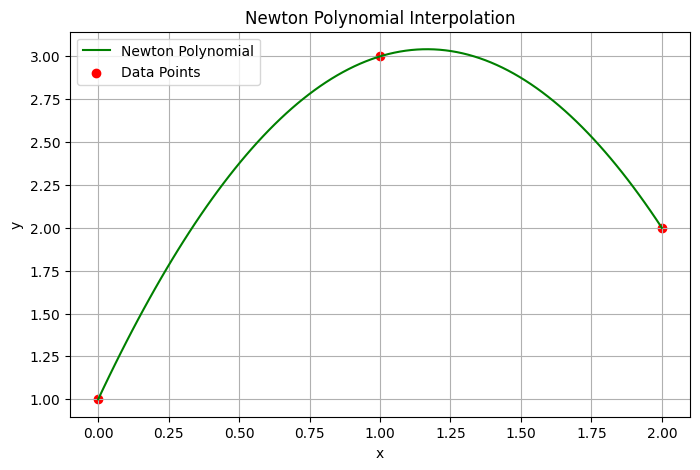

In [9]:
# Example for Newton's Interpolation
# -----------------------------------
# Using the same data points as before
x_vals_newton = np.linspace(0, 2, 100)
y_vals_newton = [newton_interpolation(x_points, y_points, x) for x in x_vals_newton]

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(x_vals_newton, y_vals_newton, label="Newton Polynomial", color="green")
plt.scatter(x_points, y_points, color="red", label="Data Points")
plt.title("Newton Polynomial Interpolation")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()


In [10]:
# Section 3: Explanation and Comparison
# ------------------------------------------------
# Both Lagrange and Newton interpolation methods produce the same polynomial
# for a given set of points, but they differ in how they are constructed.
# - Lagrange interpolation is straightforward but computationally expensive for large datasets.
# - Newton interpolation is more efficient, especially when adding new points, because
#   it uses the divided differences table.